In [4]:
!pip install composite-silhouette
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.datasets import cifar10, fashion_mnist
from composite_silhouette import CompSil

## CIFAR-10

In [22]:
(X_cifar_train, y_cifar_train), _ = cifar10.load_data()

X_cifar_flat = X_cifar_train.reshape(X_cifar_train.shape[0], -1)
X_cifar_scaled = StandardScaler().fit_transform(X_cifar_flat)
y_cifar = y_cifar_train.flatten()
num_classes_cifar = len(np.unique(y_cifar))

compsilhouette_cifar = CompSil(
    data=X_cifar_scaled,
    ground_truth=num_classes_cifar,
    k_values=range(2, 11),
    num_samples=25,
    sample_size=int(len(X_cifar_scaled) * 0.5),
    random_state=42
)

compsilhouette_cifar.evaluate()
results_df_cifar = compsilhouette_cifar.get_results_dataframe()
optimal_k_cifar = compsilhouette_cifar.get_optimal_k()

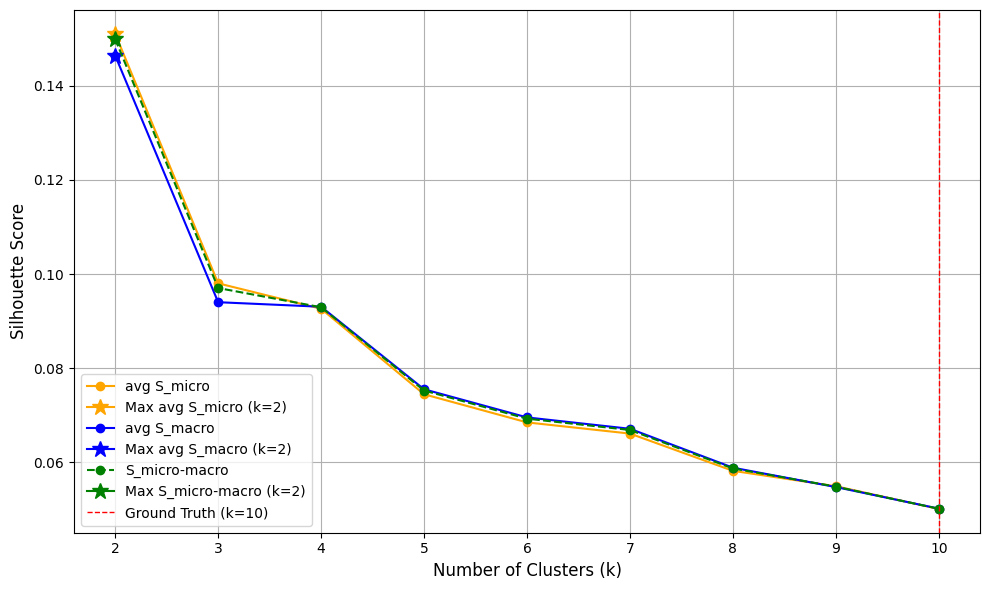

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,5.960464e-08,+,0.004643,0.151063,0.146420,0.751161,0.248839,0.149908
3,5.960464e-08,+,0.004013,0.098020,0.094007,0.751003,0.248997,0.097020
4,2.980232e-07,+,-0.000429,0.092614,0.093043,0.249893,0.750107,0.092935
5,3.290772e-04,+,-0.001061,0.074439,0.075500,0.249735,0.750265,0.075235
6,2.190834e-02,+,-0.001058,0.068460,0.069518,0.249735,0.750265,0.069254
7,5.960464e-08,+,-0.001021,0.066082,0.067104,0.249745,0.750255,0.066848
8,4.172325e-07,+,-0.000669,0.058168,0.058836,0.249833,0.750167,0.058669
9,3.123333e-01,-,0.000177,0.054893,0.054716,0.500000,0.500000,0.054804
10,4.107652e-01,-,-0.000072,0.050061,0.050133,0.500000,0.500000,0.050097


2


In [23]:
compsilhouette_cifar.plot_results()
display(results_df_cifar)
print(optimal_k_cifar)

## 20 NewsGroups

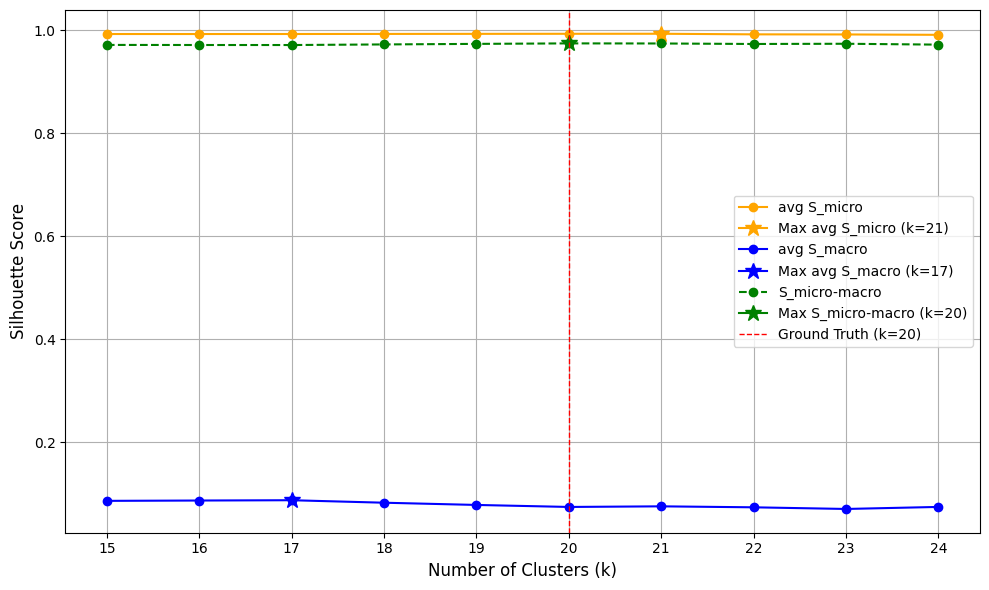

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
15,0.001953,+,0.906605,0.992777,0.086172,0.976651,0.023349,0.971609
16,0.001953,+,0.905926,0.992750,0.086824,0.976481,0.023519,0.971444
17,0.001953,+,0.905407,0.992812,0.087405,0.976352,0.023648,0.971401
18,0.001953,+,0.910383,0.992949,0.082567,0.977596,0.022404,0.972553
19,0.001953,+,0.914857,0.993095,0.078238,0.978714,0.021286,0.973622
20,0.001953,+,0.918881,0.993223,0.074341,0.979720,0.020280,0.974588
21,0.001953,+,0.917735,0.993275,0.075540,0.979434,0.020566,0.974400
22,0.001953,+,0.918502,0.992140,0.073638,0.979626,0.020374,0.973426
23,0.001953,+,0.921509,0.991944,0.070435,0.980377,0.019623,0.973862


Optimal number of clusters for 20 Newsgroups (TF-IDF + PCA): 20


In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_20ng = fetch_20newsgroups(subset='train')
num_classes_20ng = 20

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(data_20ng.data)

X_dense = X_tfidf.toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

compsilhouette_20ng = CompSil(
    data=X_pca,
    ground_truth=num_classes_20ng,
    k_values=range(15, 25),
    num_samples=10,
    sample_size=int(X_pca.shape[0] * 0.5),
    random_state=42
)

compsilhouette_20ng.evaluate()
results_df_20ng = compsilhouette_20ng.get_results_dataframe()
compsilhouette_20ng.plot_results()

display(results_df_20ng)
print(f"Optimal number of clusters for 20 Newsgroups (TF-IDF + PCA): {compsilhouette_20ng.get_optimal_k()}")

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import fetch_openml

datasets_info = {}

data_bc = load_breast_cancer()
X_bc = StandardScaler().fit_transform(data_bc.data)
datasets_info['Breast Cancer'] = {
    'X': X_bc,
    'n_classes': len(set(data_bc.target)),
}

data_seeds = fetch_openml(name='seeds', version=1, as_frame=False)
X_seeds = StandardScaler().fit_transform(data_seeds.data)
y_seeds = data_seeds.target
datasets_info['Seeds'] = {
    'X': X_seeds,
    'n_classes': len(set(y_seeds)),
}

data_iono = fetch_openml(name='ionosphere', version=1, as_frame=False)
X_iono = StandardScaler().fit_transform(data_iono.data)
y_iono = data_iono.target
datasets_info['Ionosphere'] = {
    'X': X_iono,
    'n_classes': len(set(y_iono)),
}

data_yeast = fetch_openml(name='yeast', version=4, as_frame=False)
X_yeast = StandardScaler().fit_transform(data_yeast.data)
y_yeast = data_yeast.target
datasets_info['Yeast'] = {
    'X': X_yeast,
    'n_classes': np.unique(y_yeast),
}

datasets_info.keys()

dict_keys(['Breast Cancer', 'Seeds', 'Ionosphere', 'Yeast'])

## Ionosphere

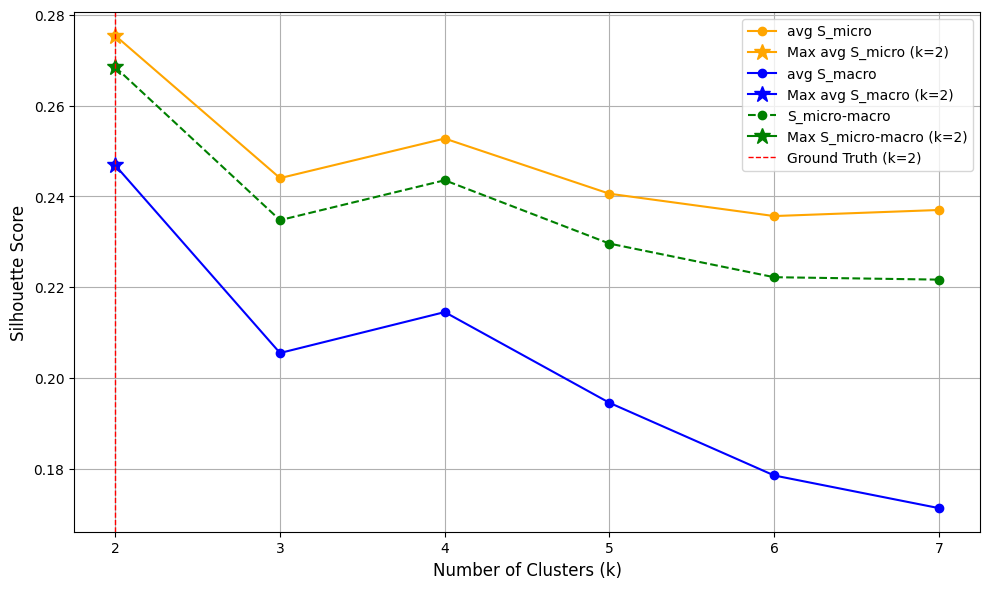

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,0.000010,+,0.028568,0.275403,0.246835,0.757142,0.242858,0.268465
3,0.006390,+,0.038515,0.244037,0.205522,0.759629,0.240371,0.234779
4,0.003153,+,0.038220,0.252755,0.214535,0.759555,0.240445,0.243565
5,0.000261,+,0.046043,0.240599,0.194556,0.761511,0.238489,0.229618
6,0.000134,+,0.057123,0.235681,0.178558,0.764281,0.235719,0.222216
7,0.000082,+,0.065649,0.237016,0.171367,0.766412,0.233588,0.221681


Optimal k (Ionosphere): 2


In [75]:
data_iono = fetch_openml(name='ionosphere', version=1, as_frame=False)
X_bc = StandardScaler().fit_transform(data_iono.data)
num_classes_bc = len(set(data_iono.target))

compsilhouette_bc = CompSil(
    data=X_bc,
    ground_truth=num_classes_bc,
    k_values=range(2, 8),
    num_samples=20,
    sample_size=int(len(X_bc) * 0.5),
    random_state=42
)

compsilhouette_bc.evaluate()
results_df_bc = compsilhouette_bc.get_results_dataframe()
compsilhouette_bc.plot_results()
display(results_df_bc)
print(f"Optimal k (Ionosphere): {compsilhouette_bc.get_optimal_k()}")

## Banknote

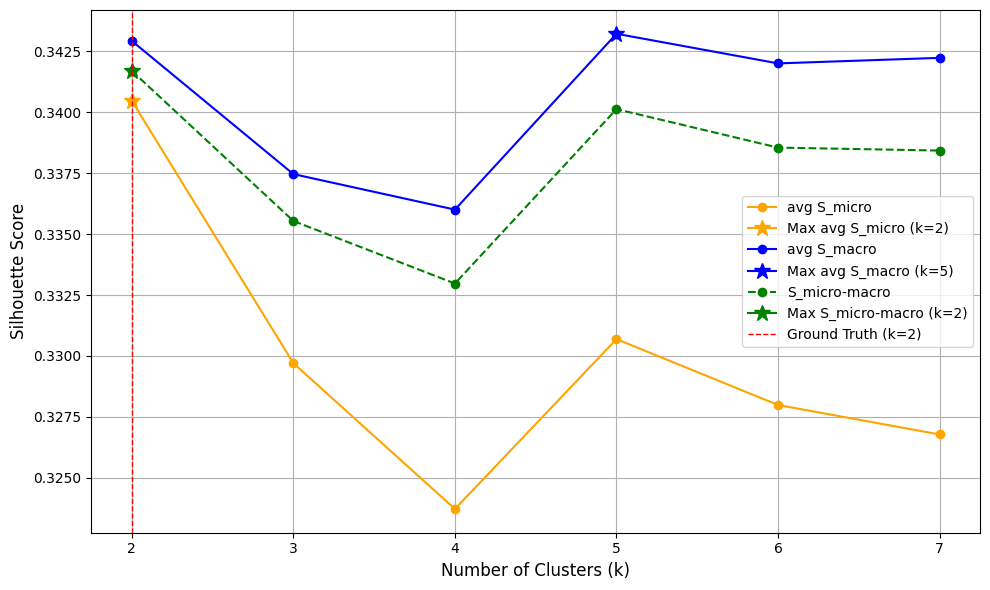

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,5.010073e-02,-,-0.002456,0.340462,0.342918,0.500000,0.500000,0.341690
3,6.440598e-18,+,-0.007751,0.329707,0.337458,0.248062,0.751938,0.335535
4,1.255579e-33,+,-0.012273,0.323728,0.336001,0.246932,0.753068,0.332971
5,2.100552e-31,+,-0.012520,0.330691,0.343211,0.246870,0.753130,0.340120
6,3.698400e-33,+,-0.014005,0.327991,0.341996,0.246499,0.753501,0.338544
7,3.078035e-31,+,-0.015440,0.326783,0.342223,0.246140,0.753860,0.338423


Optimal k (Ionosphere): 2


In [54]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np

data_banknote = fetch_openml(name='banknote-authentication', version=1, as_frame=False)
X_banknote = StandardScaler().fit_transform(data_banknote.data)
y_banknote = data_banknote.target.astype(int)
num_classes_banknote = len(np.unique(y_banknote))

X_banknote.shape, num_classes_banknote

X_bc = StandardScaler().fit_transform(data_banknote.data)
num_classes_bc = len(set(data_banknote.target))

compsilhouette_bc = CompSil(
    data=X_bc,
    ground_truth=num_classes_bc,
    k_values=range(2, 8),
    num_samples=300,
    sample_size=int(len(X_bc) * 0.09),
    random_state=42
)

compsilhouette_bc.evaluate()
results_df_bc = compsilhouette_bc.get_results_dataframe()
compsilhouette_bc.plot_results()
display(results_df_bc)
print(f"Optimal k (Ionosphere): {compsilhouette_bc.get_optimal_k()}")

## Blood Transfusion

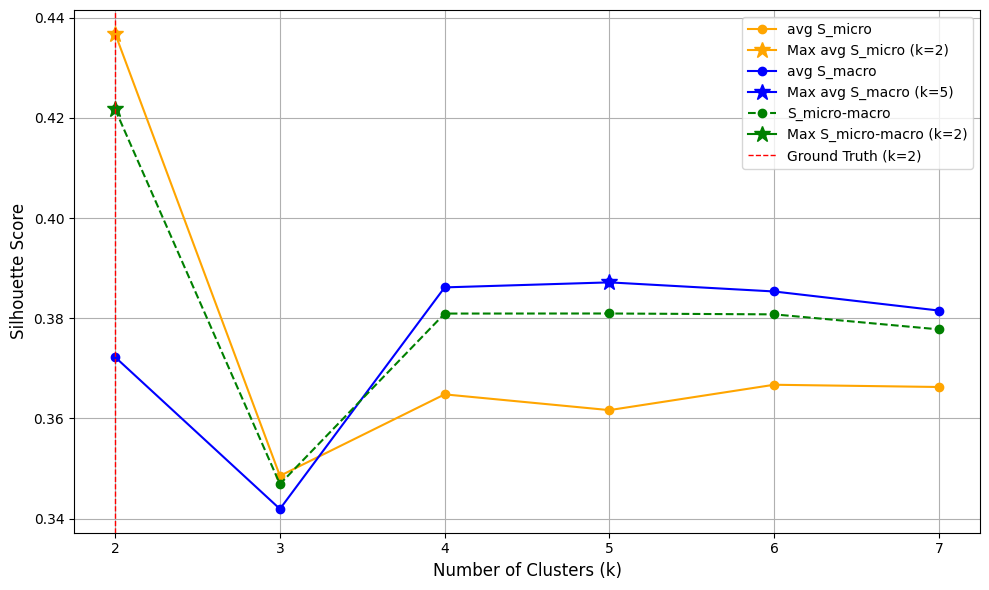

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,8.881784e-15,+,0.064547,0.436785,0.372238,0.766137,0.233863,0.421690
3,3.126166e-02,+,0.006606,0.348550,0.341944,0.751652,0.248348,0.346909
4,3.913314e-03,+,-0.021350,0.364816,0.386166,0.244663,0.755337,0.380942
5,2.409992e-04,+,-0.025497,0.361670,0.387167,0.243626,0.756374,0.380955
6,4.878707e-05,+,-0.018618,0.366733,0.385350,0.245346,0.754654,0.380783
7,3.286211e-02,+,-0.015257,0.366286,0.381543,0.246186,0.753814,0.377787


2

In [118]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_blood = fetch_openml(name='blood-transfusion-service-center', version=1, as_frame=True)
X_blood = data_blood.data
y_blood_raw = data_blood.target

le = LabelEncoder()
y_blood = le.fit_transform(y_blood_raw)
num_classes_blood = len(np.unique(y_blood))

X_blood_scaled = StandardScaler().fit_transform(X_blood)

compsilhouette_blood = CompSil(
    data=X_blood_scaled,
    ground_truth=num_classes_blood,
    k_values=range(2, 8),
    num_samples=50,
    sample_size=int(len(X_blood_scaled) * 0.7),
    random_state=42
)

compsilhouette_blood.evaluate()
results_df_blood = compsilhouette_blood.get_results_dataframe()
optimal_k_blood = compsilhouette_blood.get_optimal_k()

compsilhouette_blood.plot_results()
display(results_df_blood)

optimal_k_blood

## Parkinsons

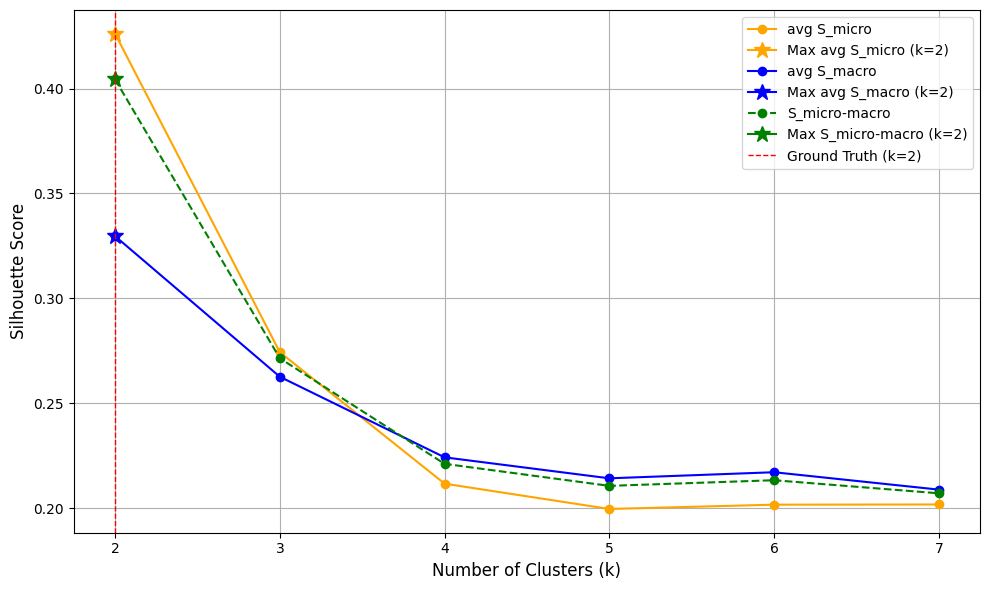

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.862645e-09,+,0.096474,0.426127,0.329653,0.774118,0.225882,0.404335
3,3.744433e-03,+,0.011708,0.274350,0.262642,0.752927,0.247073,0.271457
4,3.272090e-02,+,-0.012552,0.211695,0.224247,0.246862,0.753138,0.221148
5,2.367495e-03,+,-0.014610,0.199640,0.214250,0.246348,0.753652,0.210651
6,2.832636e-04,+,-0.015466,0.201680,0.217146,0.246133,0.753867,0.213339
7,2.932586e-02,+,-0.007082,0.201778,0.208860,0.248229,0.751771,0.207102


Optimal number of clusters (Parkinsons): 2


In [83]:
data_parkinson = fetch_openml(name='parkinsons', version=1, as_frame=True)
X_parkinson = data_parkinson.data
y_parkinson_raw = data_parkinson.target

le_parkinson = LabelEncoder()
y_parkinson = le_parkinson.fit_transform(y_parkinson_raw)
num_classes_parkinson = len(np.unique(y_parkinson))

X_parkinson_scaled = StandardScaler().fit_transform(X_parkinson)

compsilhouette_parkinson = CompSil(
    data=X_parkinson_scaled,
    ground_truth=num_classes_parkinson,
    k_values=range(2, 8),
    num_samples=30,
    sample_size=int(len(X_parkinson_scaled) * 0.8),
    random_state=42
)

compsilhouette_parkinson.evaluate()
results_df_parkinson = compsilhouette_parkinson.get_results_dataframe()
compsilhouette_parkinson.plot_results()
display(results_df_parkinson)
print(f"Optimal number of clusters (Parkinsons): {compsilhouette_parkinson.get_optimal_k()}")

## HTRU2

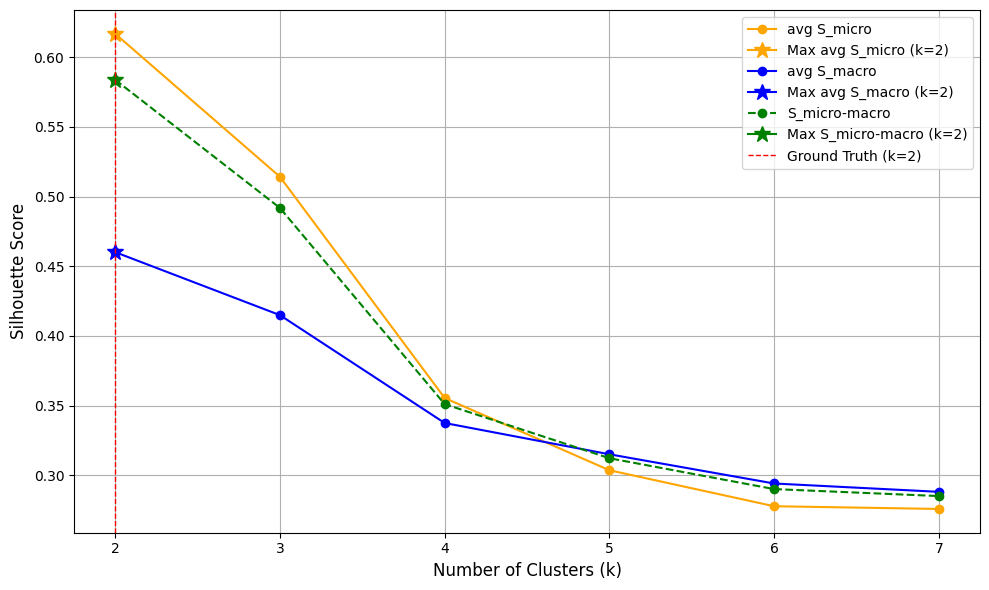

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.862645e-09,+,0.156767,0.616907,0.460140,0.789192,0.210808,0.583859
3,1.862645e-09,+,0.099304,0.514240,0.414937,0.774826,0.225174,0.491880
4,2.607703e-08,+,0.017953,0.355451,0.337498,0.754488,0.245512,0.351043
5,1.683831e-06,+,-0.011458,0.303578,0.315036,0.247136,0.752864,0.312204
6,1.862645e-09,+,-0.016321,0.277750,0.294070,0.245920,0.754080,0.290057
7,1.862645e-09,+,-0.012294,0.275786,0.288080,0.246926,0.753074,0.285045


Optimal number of clusters (HTRU2): 2


In [122]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

htru2 = fetch_ucirepo(id=372)
X_htru2 = htru2.data.features.to_numpy()
y_raw_htru2 = htru2.data.targets.iloc[:, 0]  # Single binary column

le_htru2 = LabelEncoder()
y_htru2 = le_htru2.fit_transform(y_raw_htru2)
num_classes_htru2 = len(np.unique(y_htru2))

X_htru2_scaled = StandardScaler().fit_transform(X_htru2)

compsilhouette_htru2 = CompSil(
    data=X_htru2_scaled,
    ground_truth=num_classes_htru2,
    k_values=range(2, 8),
    num_samples=30,
    sample_size=int(len(X_htru2_scaled) * 0.5),
    random_state=42
)

compsilhouette_htru2.evaluate()
results_df_htru2 = compsilhouette_htru2.get_results_dataframe()
compsilhouette_htru2.plot_results()
display(results_df_htru2)
print(f"Optimal number of clusters (HTRU2): {compsilhouette_htru2.get_optimal_k()}")

## Spambase

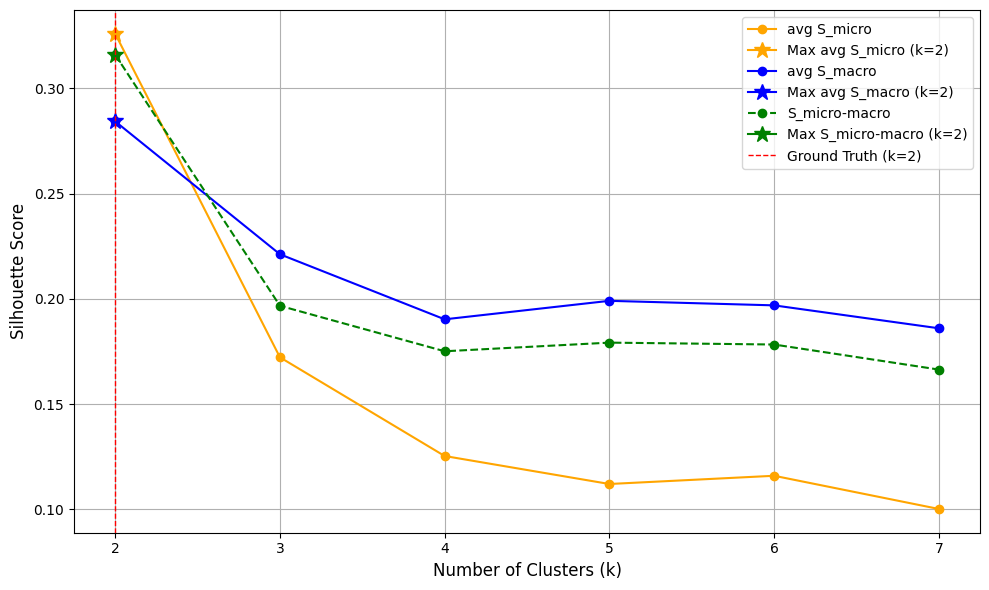

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,0.000153,+,0.041622,0.325911,0.284288,0.760406,0.239594,0.315938
3,0.054922,-,-0.048949,0.172217,0.221166,0.500000,0.500000,0.196692
4,0.009301,+,-0.064930,0.125334,0.190264,0.233768,0.766232,0.175085
5,0.000006,+,-0.087013,0.112037,0.199050,0.228247,0.771753,0.179190
6,0.000153,+,-0.080948,0.115946,0.196894,0.229763,0.770237,0.178295
7,0.000003,+,-0.085828,0.100180,0.186008,0.228543,0.771457,0.166392


2

In [130]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_spambase = fetch_openml(name='spambase', version=1, as_frame=True)
X_spambase = data_spambase.data
y_spambase_raw = data_spambase.target

le_spam = LabelEncoder()
y_spambase = le_spam.fit_transform(y_spambase_raw)
num_classes_spambase = len(np.unique(y_spambase))

X_spambase_scaled = StandardScaler().fit_transform(X_spambase)

compsilhouette_spambase = CompSil(
    data=X_spambase_scaled,
    ground_truth=num_classes_spambase,
    k_values=range(2, 8),
    num_samples=30,
    sample_size=int(len(X_spambase_scaled) * 0.5),
    random_state=42
)

compsilhouette_spambase.evaluate()
results_df_spambase = compsilhouette_spambase.get_results_dataframe()
compsilhouette_spambase.plot_results()

display(results_df_spambase)
compsilhouette_spambase.get_optimal_k()

## Bank Marketing

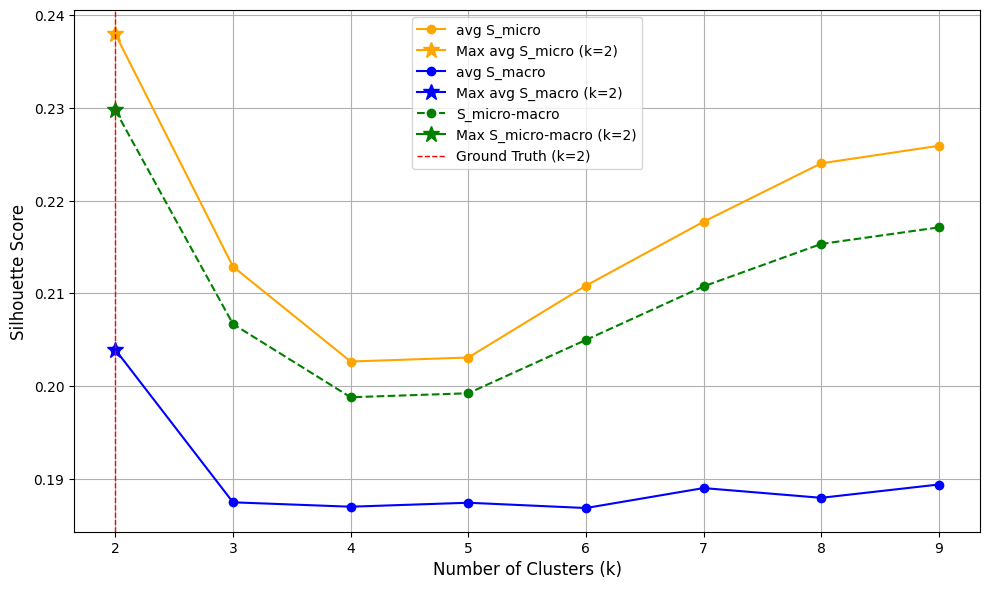

,p-value,St. significance,Mean difference,avg S_micro,avg S_macro,w_micro,w_macro,S_micro-macro
number of clusters (k),,,,,,,,
2,1.862645e-09,+,0.034001,0.237946,0.203945,0.758500,0.241500,0.229735
3,2.366677e-05,+,0.025395,0.212893,0.187497,0.756349,0.243651,0.206705
4,1.683831e-06,+,0.015644,0.202668,0.187023,0.753911,0.246089,0.198818
5,1.862645e-09,+,0.015646,0.203098,0.187452,0.753911,0.246089,0.199247
6,1.862645e-09,+,0.023957,0.210839,0.186882,0.755989,0.244011,0.204993
7,1.862645e-09,+,0.028699,0.217731,0.189032,0.757175,0.242825,0.210762
8,3.725290e-09,+,0.036037,0.224019,0.187982,0.759009,0.240991,0.215335
9,1.862645e-09,+,0.036494,0.225910,0.189416,0.759124,0.240876,0.217120


Optimal number of clusters (Bank Marketing): 2


In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

data_bank = fetch_openml(name='bank-marketing', version=1, as_frame=True)
X_bank = data_bank.data.select_dtypes(include=[np.number])  # numeric features only
y_bank_raw = data_bank.target

le_bank = LabelEncoder()
y_bank = le_bank.fit_transform(y_bank_raw)
num_classes_bank = len(np.unique(y_bank))

X_bank_scaled = StandardScaler().fit_transform(X_bank)

compsilhouette_bank = CompSil(
    data=X_bank_scaled,
    ground_truth=num_classes_bank,
    k_values=range(2, 10),   # 2‑5 clusters for evaluation
    num_samples=30,         # 30 subsamples
    sample_size=int(len(X_bank_scaled) * 0.6),
    random_state=42
)

compsilhouette_bank.evaluate()
results_df_bank = compsilhouette_bank.get_results_dataframe()
compsilhouette_bank.plot_results()
display(results_df_bank)
print(f"Optimal number of clusters (Bank Marketing): {compsilhouette_bank.get_optimal_k()}")